In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import r2_score

In [23]:
df = pd.read_parquet("../data/end_df.parquet")
df.head()

,place,product,Our_company,cost,Арториас&Co,Длань господня,ЛилIT,Светлые Души,hot,rain,...,year,month,day,Арториас&Co_k,Длань господня_k,ЛилIT_k,Светлые Души_k,1/amount,max_price,min_price
0,Анор Лондо,Целебные травы,3.9,2.07,3.78,4.21,4.18,3.75,1.0,0.0,...,2216,1,2,1.031746,0.926366,0.933014,1.04,0.025069,4.21,3.75
1,Анор Лондо,Целебные травы,3.9,2.07,3.78,4.21,4.18,3.75,1.0,0.0,...,2216,1,3,1.031746,0.926366,0.933014,1.04,0.023761,4.21,3.75
2,Анор Лондо,Целебные травы,3.9,2.07,3.78,4.21,4.18,3.75,0.0,0.0,...,2216,1,4,1.031746,0.926366,0.933014,1.04,0.026369,4.21,3.75
3,Анор Лондо,Целебные травы,3.9,2.07,3.78,4.21,4.18,3.75,0.0,0.0,...,2216,1,5,1.031746,0.926366,0.933014,1.04,0.025747,4.21,3.75
4,Анор Лондо,Целебные травы,3.9,2.07,3.78,4.21,4.18,3.75,0.0,0.0,...,2216,1,6,1.031746,0.926366,0.933014,1.04,0.021744,4.21,3.75


In [24]:
df = df[df["amount"] > 0]
df = pd.get_dummies(df, columns=['product', 'place'])
df.head()

,Our_company,cost,Арториас&Co,Длань господня,ЛилIT,Светлые Души,hot,rain,snow,amount,...,max_price,min_price,product_Целебные травы,product_Эльфийская пыльца,product_Эстус,place_Анор Лондо,place_Врата Балдура,place_Кеджистан,place_Нокрон,place_Фалькония
0,3.9,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,39.889286,...,4.21,3.75,True,False,False,True,False,False,False,False
1,3.9,2.07,3.78,4.21,4.18,3.75,1.0,0.0,0.0,42.086108,...,4.21,3.75,True,False,False,True,False,False,False,False
2,3.9,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,37.922631,...,4.21,3.75,True,False,False,True,False,False,False,False
3,3.9,2.07,3.78,4.21,4.18,3.75,0.0,0.0,0.0,38.839745,...,4.21,3.75,True,False,False,True,False,False,False,False
4,3.9,2.07,3.78,4.21,4.18,3.75,0.0,0.0,1.0,45.990511,...,4.21,3.75,True,False,False,True,False,False,False,False


In [25]:
X = df.drop('Our_company', axis=1)
y = df['Our_company']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

Посмотрим для регрессии:

In [26]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9925509894764306

In [27]:
reg.coef_

array([ 2.99240544e-02,  2.76749828e-01,  3.26790864e-01, -8.28809329e-02,
       -5.63472208e-02,  2.33875206e-02,  3.36693791e-02, -9.12835895e-04,
       -2.61513367e-03,  1.06589447e-01,  1.67357216e-02,  4.62085047e-04,
        3.47906523e+00,  5.96547590e+00,  3.52849441e-01,  3.64817541e-01,
        2.81283418e-02,  2.21373348e-01,  2.75192195e-01, -1.55216956e-01,
        2.75683508e-01, -1.20466552e-01, -2.93412191e-01,  3.59626383e-01,
        1.44635615e-01, -1.33073557e-01, -7.77762499e-02])

Построим случайный лес:

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# from sklearn.model_selection import GridSearchCV

mae_scores = []
mse_scores = []
estimators_count = 30

for n_estimators in range(1, estimators_count):
	model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	_mae = mean_absolute_error(y_test, y_pred)
	_mse = mean_squared_error(y_test, y_pred)
	mae_scores.append(_mae)
	mse_scores.append(_mse)

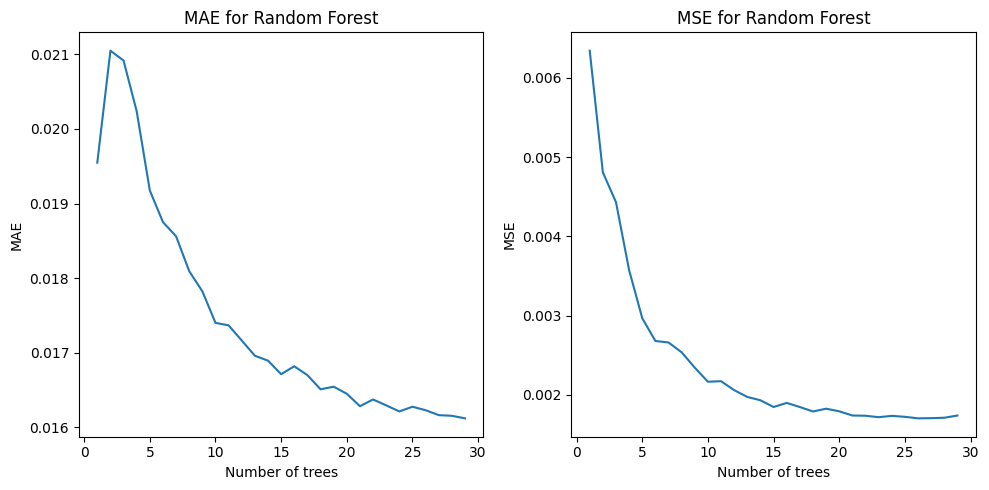

In [29]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, estimators_count), mae_scores)
plt.title('MAE for Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('MAE')

plt.subplot(1, 2, 2)
plt.plot(range(1, estimators_count), mse_scores)
plt.title('MSE for Random Forest')
plt.xlabel('Number of trees')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()

In [30]:
r2_score(y_test, y_pred)

0.999944646680909